## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn import metrics

from sklearn.metrics import (confusion_matrix,accuracy_score,precision_score,recall_score,f1_score)

import warnings
warnings.filterwarnings("ignore")



# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

## Import Dataset

In [ ]:
# Connection to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Reading the dataset from Gdrive
data_orig = pd.read_csv('/content/drive/MyDrive/AIML_Apr_2025/Projects/Project3: EasyVisa/EasyVisa.csv')

In [ ]:
data = data_orig.copy() #Copy the original data set to another variable, so that we don't make changes to the origianl data set

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [ ]:
data.head() # View sample data(Top 5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
# @title
data.tail() #View sample data(Bottom 5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Understand the shape of the dataset

In [ ]:
data.shape  # View the no.of rows & columns in the dataset
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns in the dataset.")

There are 25480 rows and 12 columns in the dataset.


#### Check the data types of the columns for the dataset

In [ ]:
data.info() # View the data types of each column

#Observation: There are 12 columns (2 integers, 9 object & 1 float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
data.isnull().sum() #Verify if there are any null data

#No null data found in the dataset

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [ ]:
data.duplicated().sum() #Verify if there are any duplicates in the dataset

#No Duplicates found in the dataset

np.int64(0)

## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [ ]:
data.describe(include='all') #View the Statistical summary of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
count,25480,25480,25480,25480,25480,25480.000000,25480.000000,25480,25480.000000,25480,25480,25480
unique,25480,6,4,2,2,NaN,NaN,5,NaN,4,2,2
top,EZYV25480,Asia,Bachelor's,Y,N,NaN,NaN,Northeast,NaN,Year,Y,Certified
freq,1,16861,10234,14802,22525,NaN,NaN,7195,NaN,22962,22773,17018
mean,NaN,NaN,NaN,NaN,NaN,5667.043210,1979.409929,NaN,74455.814592,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,22877.928848,42.366929,NaN,52815.942327,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-26.000000,1800.000000,NaN,2.136700,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1022.000000,1976.000000,NaN,34015.480000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2109.000000,1997.000000,NaN,70308.210000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3504.000000,2005.000000,NaN,107735.512500,NaN,NaN,NaN


In [ ]:
data.describe(include='all').transpose() #View the Statistical summary of the data by transposing

#Most of the employees are from Asia, Northeast & have a Bachelor's degree
#no_of_employees has a value of -26 which looks wrong
#The prevailing_wage has a min value of 2.1367, mean of 74455.81 & max of 319210.27. This has some outliers
#Most of the employees are in full time position
#Most of the employees have job experience

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV25480,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Fixing the negative values in number of employees columns

In [ ]:
data.loc[data["no_of_employees"] < 0].shape #We can't have negative values for no_of_employees, so let's assume this as a positive value

(33, 12)

In [ ]:
data.loc[data["no_of_employees"] < 0, "no_of_employees"] = data["no_of_employees"] * -1 #Multiply the value with -1, so the value becomes positive

In [ ]:
data.loc[data["no_of_employees"] < 0].shape # No of employees after conversion

(0, 12)

#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
categorical_columns = list(data.select_dtypes(include='object').columns) # List of categrorical variables
categorical_columns

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [ ]:
# Iterate through each categorical column and print the value counts as percentages.
for i in categorical_columns:
  print(data[i].value_counts(normalize=True) * 100)
  print("-"*100)

'''
Observations:
Continent: Asia accounts for the largest percentage of applicants (66.17%).
Education: Bachelor's degrees are the most common education level among applicants (40.16%).
Job Experience: A majority of applicants have job experience (58.09%).
Region of Employment: The Northeast region is the most frequent intended region of employment (28.24%).
Unit of Wage: Yearly wage is the most prevalent unit of wage (90.12%).
Case ID: All case IDs are unique.
'''

case_id
EZYV25480    0.003925
EZYV01       0.003925
EZYV02       0.003925
EZYV03       0.003925
EZYV04       0.003925
               ...   
EZYV13       0.003925
EZYV12       0.003925
EZYV11       0.003925
EZYV10       0.003925
EZYV09       0.003925
Name: proportion, Length: 25480, dtype: float64
----------------------------------------------------------------------------------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
has_job_experience
Y    58.092622
N    

"\nObservations:\nContinent: Asia accounts for the largest percentage of applicants (66.17%).\nEducation: Bachelor's degrees are the most common education level among applicants (40.16%).\nJob Experience: A majority of applicants have job experience (58.09%).\nRegion of Employment: The Northeast region is the most frequent intended region of employment (28.24%).\nUnit of Wage: Yearly wage is the most prevalent unit of wage (90.12%).\nCase ID: All case IDs are unique.\n"

In [ ]:
df = data.drop(['case_id'], axis=1) # Drop the case_id as this is not bringing any value to the data set

In [ ]:
df.head() #verify the top 5 rows to check, if the case_id column has been removed

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

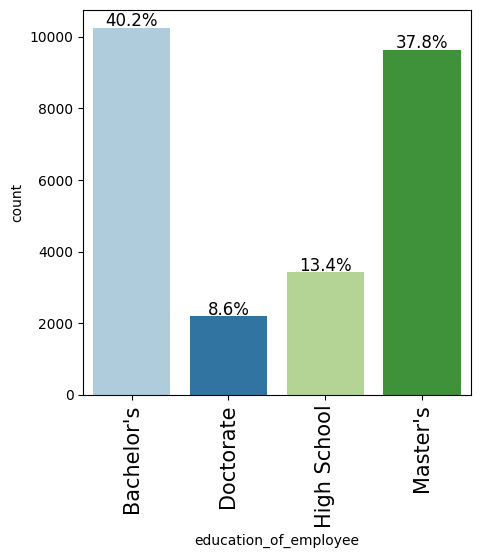

"\n40 % of the employees have Bachelor's degree followed by master's, high school & Doctorate degrees.\n"

In [ ]:
labeled_barplot(df, 'education_of_employee',perc=True)
'''
40 % of the employees have Bachelor's degree followed by master's, high school & Doctorate degrees.
'''

#### Observations on region of employment

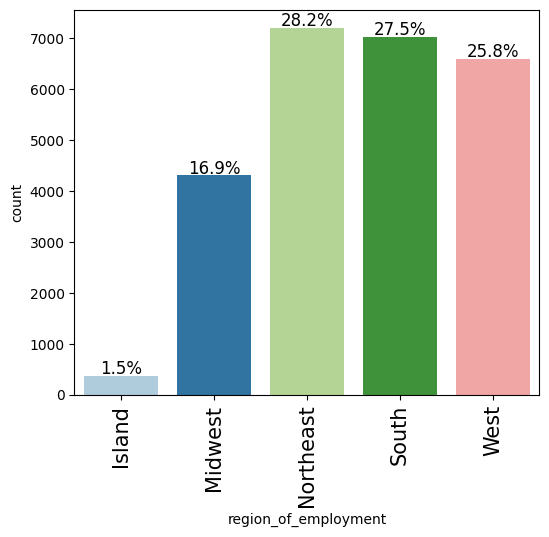

'\nThe Northeast region has the highest percentage of applicants (28.2%).\nThe South and West regions have a similar percentage of applicants, around 27.5% and 25.8% respectively.\nThe Midwest region accounts for about 16.9% of the applicants.\nThe Island region has the lowest percentage of applicants, at only 1.5%.\nThis suggests that the intended region of employment is most frequently in the Northeast, South, and West regions of the US.\n'

In [ ]:
labeled_barplot(df, 'region_of_employment',perc=True)

'''
The Northeast region has the highest percentage of applicants (28.2%).
The South and West regions have a similar percentage of applicants, around 27.5% and 25.8% respectively.
The Midwest region accounts for about 16.9% of the applicants.
The Island region has the lowest percentage of applicants, at only 1.5%.
This suggests that the intended region of employment is most frequently in the Northeast, South, and West regions of the US.
'''

#### Observations on job experience

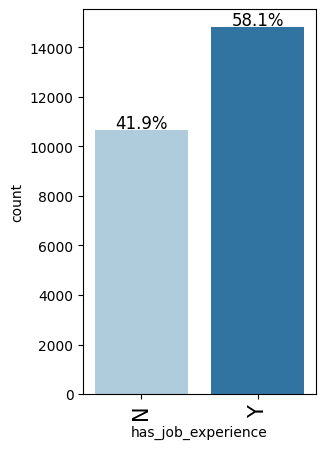

In [ ]:
labeled_barplot(df, 'has_job_experience',perc=True)
#Observation: 58 % of the employee already have a job experience

#### Observations on case status

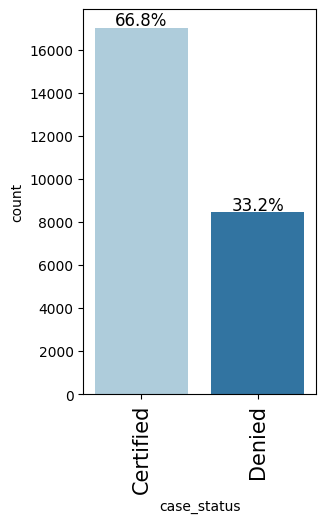

In [ ]:
labeled_barplot(df, 'case_status',perc=True)
# ~67% of the employees are certified

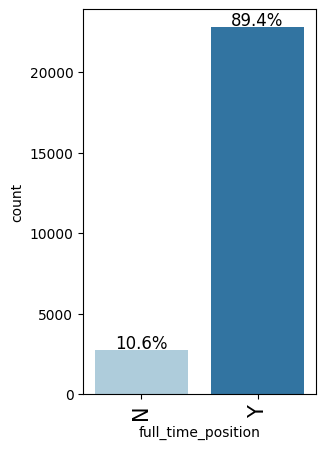

In [ ]:
labeled_barplot(df, 'full_time_position',perc=True)
# ~89% of the employees are in full time position

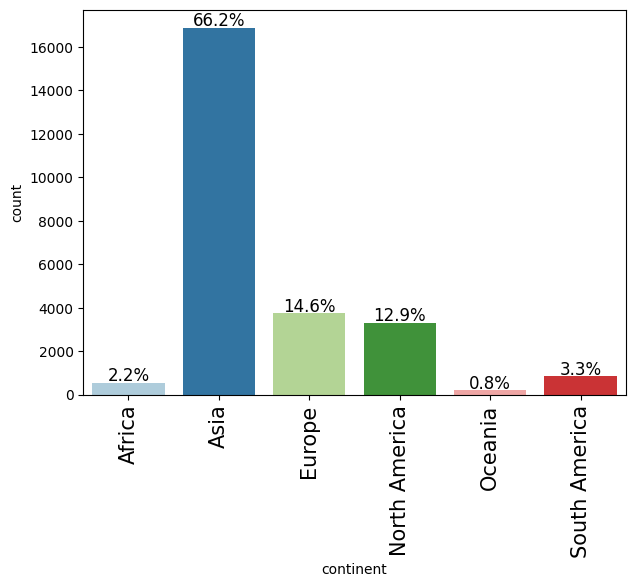

In [ ]:
labeled_barplot(df,'continent',perc=True)
#66% of the employees are from Asia, followed by Europe & North America. Ocenania has the least # of employees

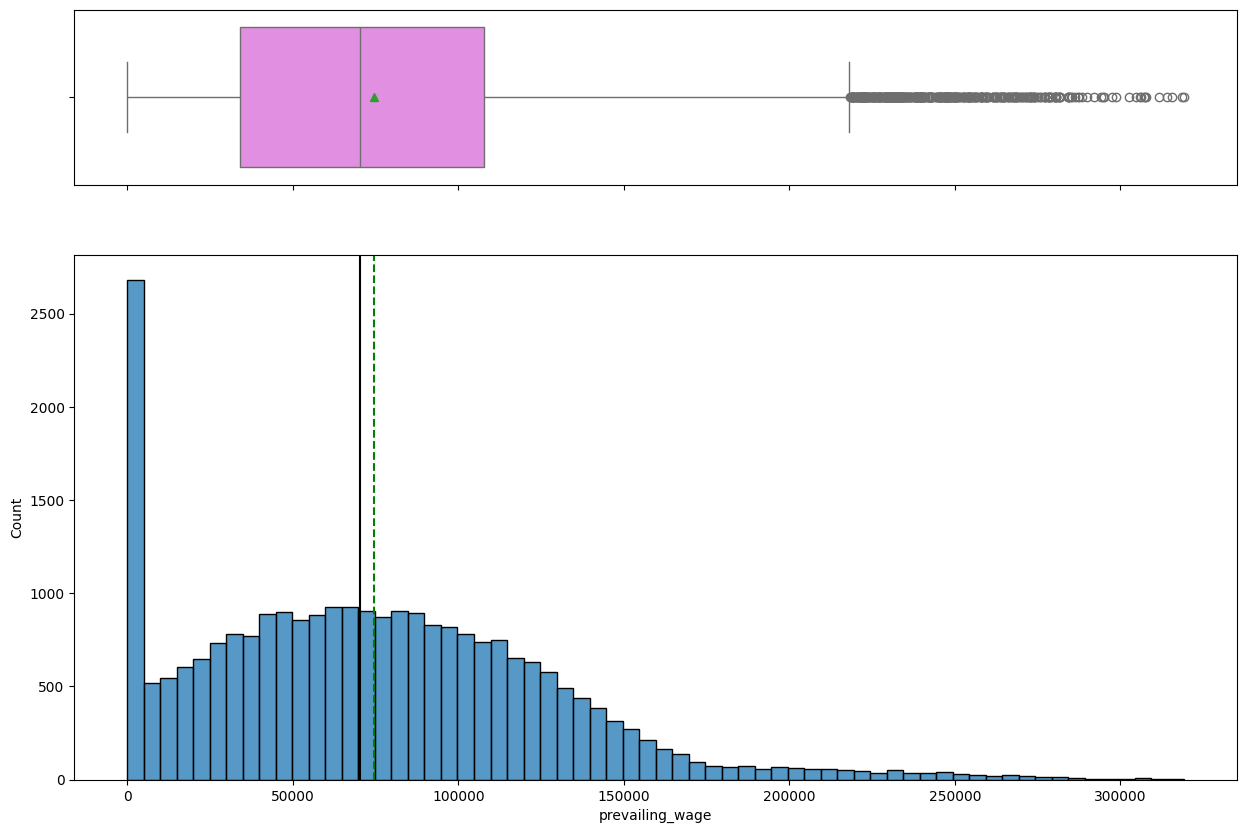

In [ ]:
histogram_boxplot(df, 'prevailing_wage')
#observation:
#The distribution of prevailing wage is right-skewed, with a large concentration of wages at the lower end and a long tail extending towards higher wages.
#The outliers could be the wages of C-level executives

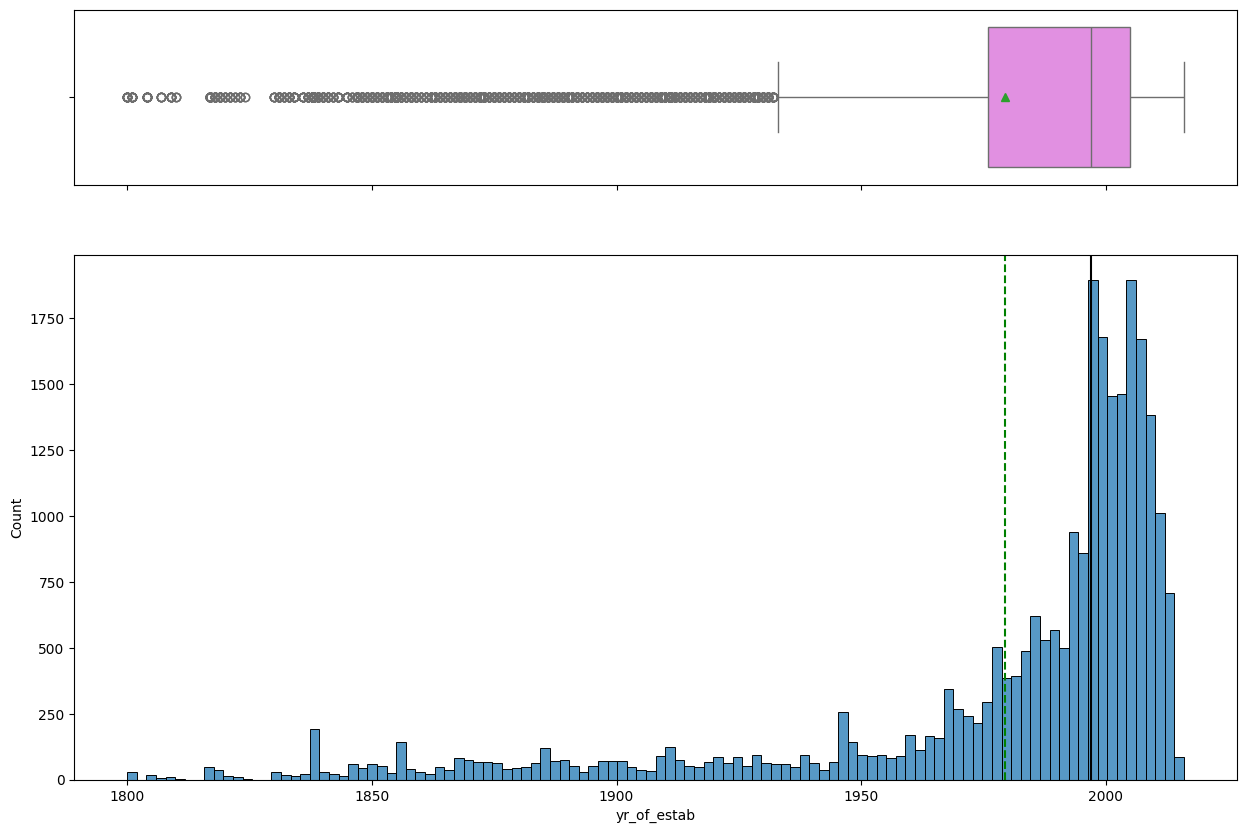

In [ ]:
histogram_boxplot(df, 'yr_of_estab')
#The distribution of the year of establishment is skewed towards more recent years,
#with a large number of companies established in the late 20th and early 21st centuries.

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target, perc=False):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    if perc:
        for container in plt.gca().containers:
            plt.bar_label(container, fmt='%.1f%%', label_type='center')
    plt.show()

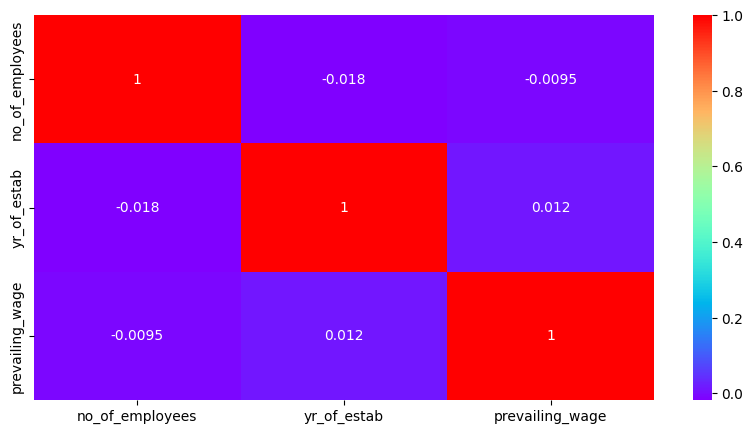

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, cmap="rainbow"
)
plt.show()

#### Does higher education increase the chances of visa certification for well-paid jobs abroad?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


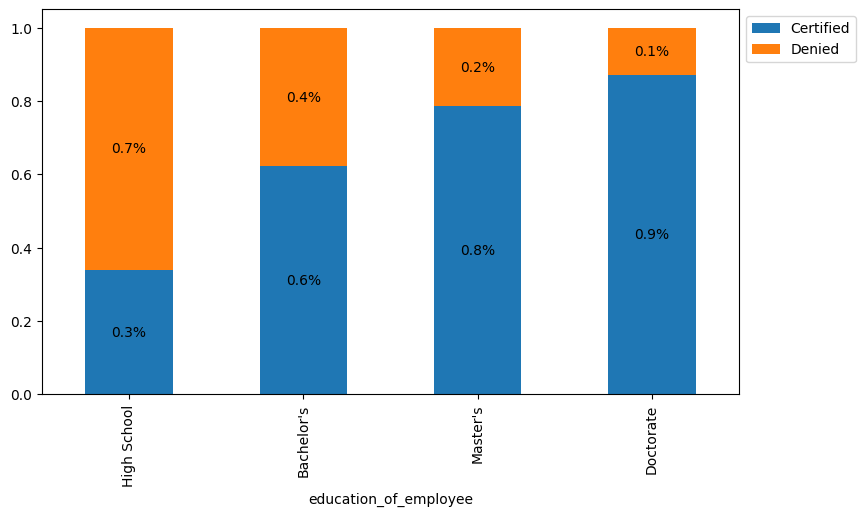

In [ ]:
stacked_barplot(df, 'education_of_employee', 'case_status', perc=True)
#Observation:  There is a positive relationship between higher levels of education and the likelihood of visa certification

#### How does visa status vary across different continents?

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


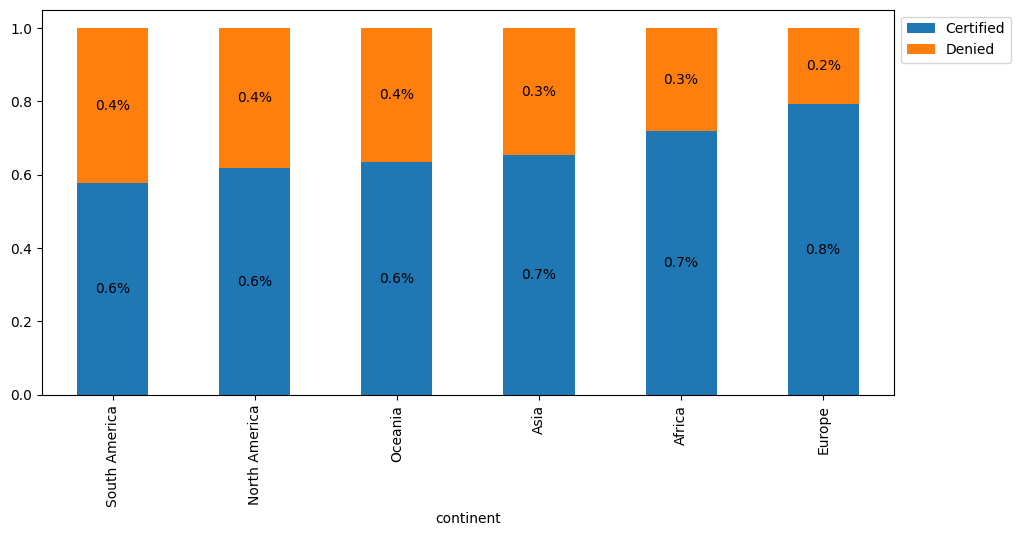

In [ ]:
stacked_barplot(df, 'continent', 'case_status', perc=True)
#Observation: Europe has the highest percentage of visa certification

#### Does having prior work experience influence the chances of visa certification for career opportunities abroad?

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


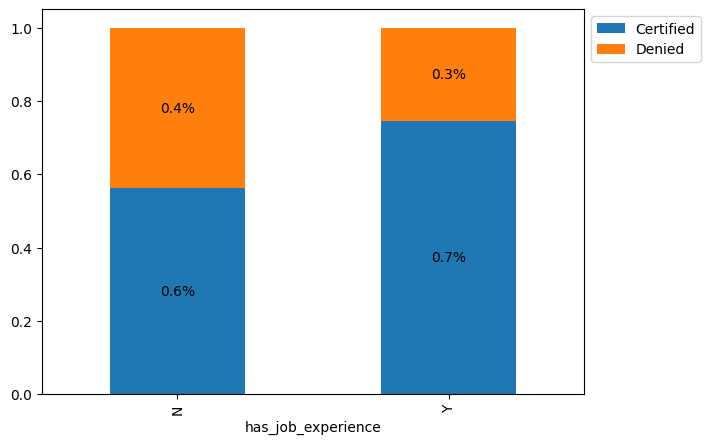

In [ ]:
stacked_barplot(df, 'has_job_experience', 'case_status', perc=True)
#Observation: Yes, there is a positive relationship between having prior work experience and the likelihood of visa certification

#### Is the prevailing wage consistent across all regions of the US?

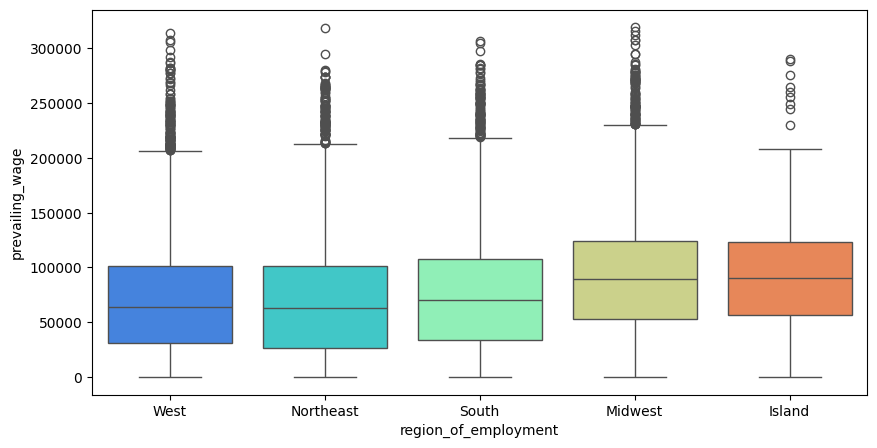

'\nThe median prevailing wage varies across different regions.\nThe Midwest region appears to have a higher median prevailing wage compared to other regions.\nAll regions show the presence of outliers with very high prevailing wages.\nTherefore, the prevailing wage is not consistent across all regions of the US.\n'

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="region_of_employment", y="prevailing_wage", palette="rainbow")
plt.show()
'''
The median prevailing wage varies across different regions.
The Midwest region appears to have a higher median prevailing wage compared to other regions.
All regions show the presence of outliers with very high prevailing wages.
Therefore, the prevailing wage is not consistent across all regions of the US.
'''

#### Does visa status vary with changes in the prevailing wage set to protect both local talent and foreign workers?

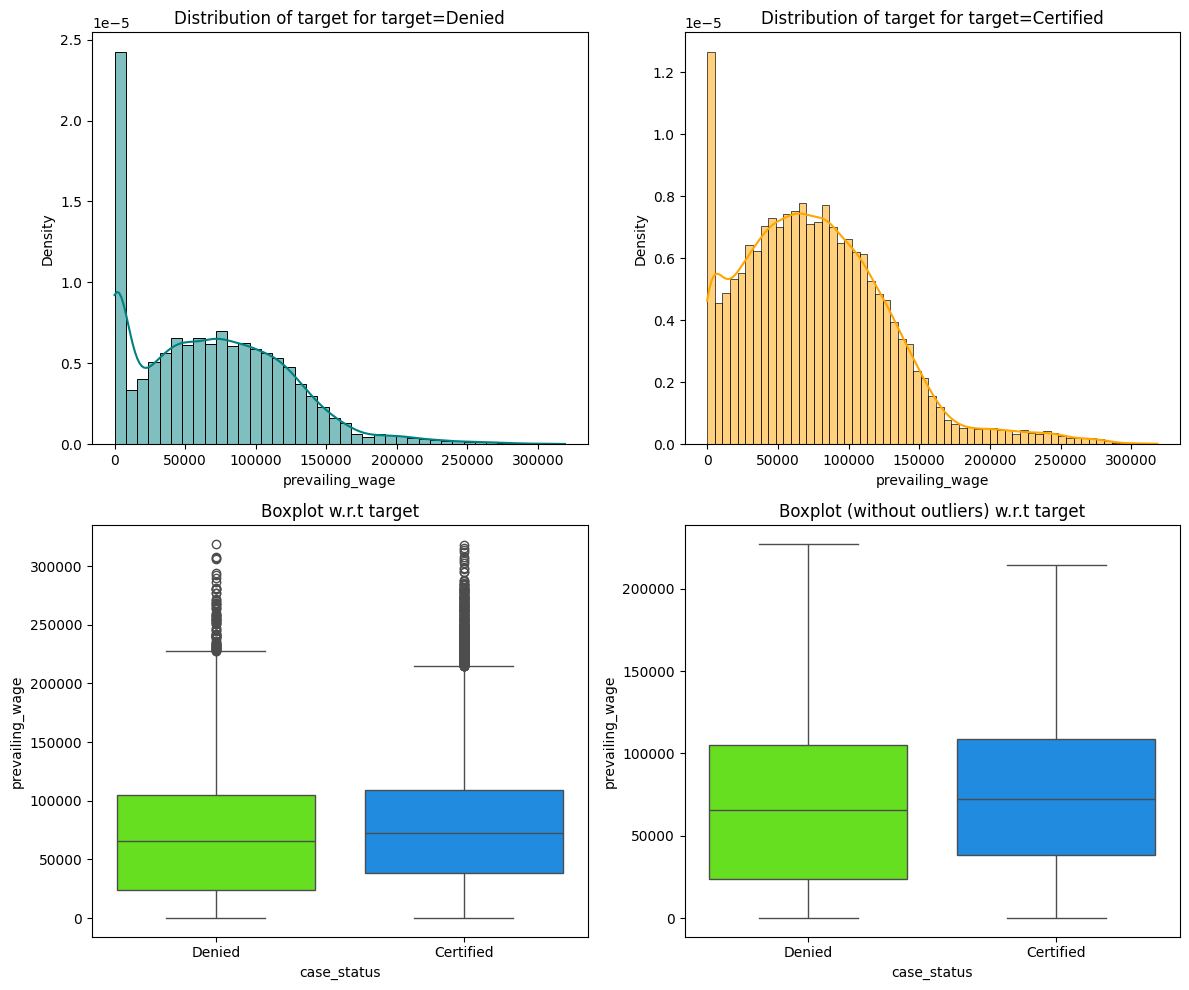

In [ ]:
distribution_plot_wrt_target(data,"prevailing_wage","case_status")
#Observation: There is a positive relationship between prevailing wage and the likelihood of visa certification

#### Does the unit of prevailing wage (Hourly, Weekly, etc.) have any impact on the likelihood of visa application certification?

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


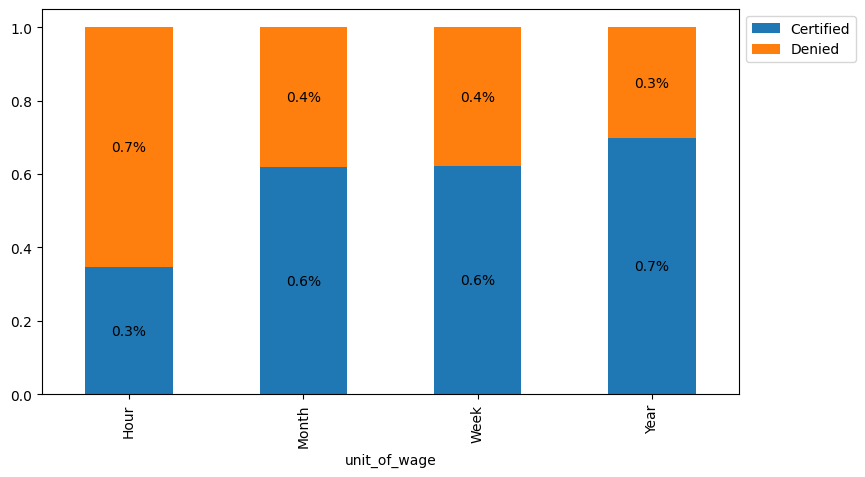

In [ ]:
stacked_barplot(df, 'unit_of_wage', 'case_status', perc=True)
#Observation: If the unit_of_wage is yearly, then there is a high chance of approval

continent    Africa   Asia  Europe  North America  Oceania  South America  \
case_status                                                                 
All             551  16861    3732           3292      192            852   
Certified       397  11012    2957           2037      122            493   
Denied          154   5849     775           1255       70            359   

continent      All  
case_status         
All          25480  
Certified    17018  
Denied        8462  
------------------------------------------------------------------------------------------------------------------------


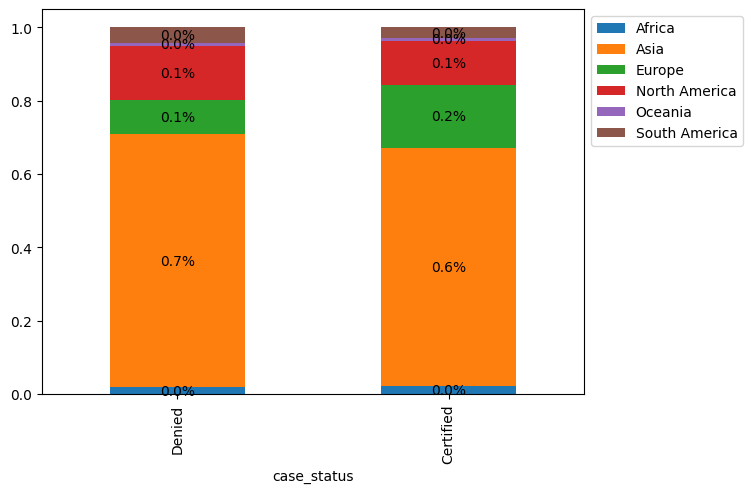

education_of_employee  Bachelor's  Doctorate  High School  Master's    All
case_status                                                               
All                         10234       2192         3420      9634  25480
Certified                    6367       1912         1164      7575  17018
Denied                       3867        280         2256      2059   8462
------------------------------------------------------------------------------------------------------------------------


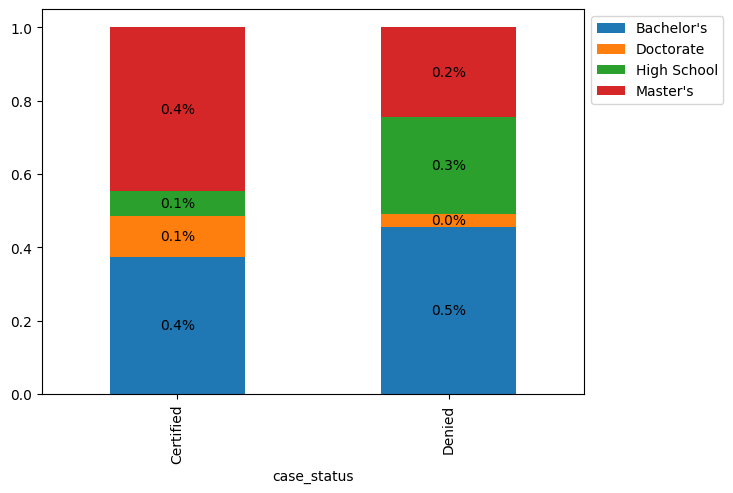

has_job_experience      N      Y    All
case_status                            
All                 10678  14802  25480
Certified            5994  11024  17018
Denied               4684   3778   8462
------------------------------------------------------------------------------------------------------------------------


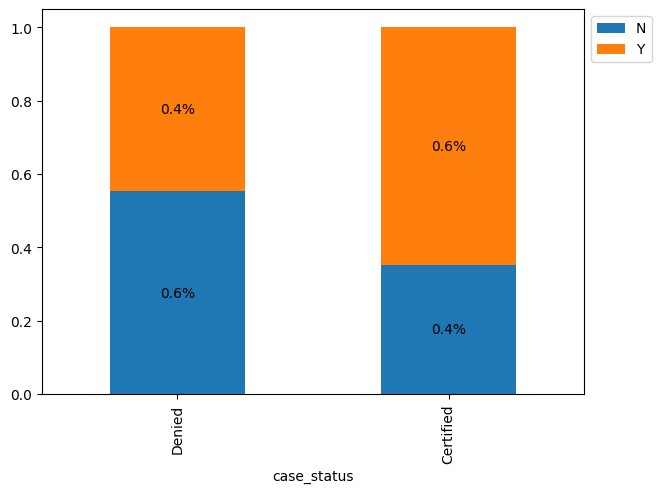

requires_job_training      N     Y    All
case_status                              
All                    22525  2955  25480
Certified              15012  2006  17018
Denied                  7513   949   8462
------------------------------------------------------------------------------------------------------------------------


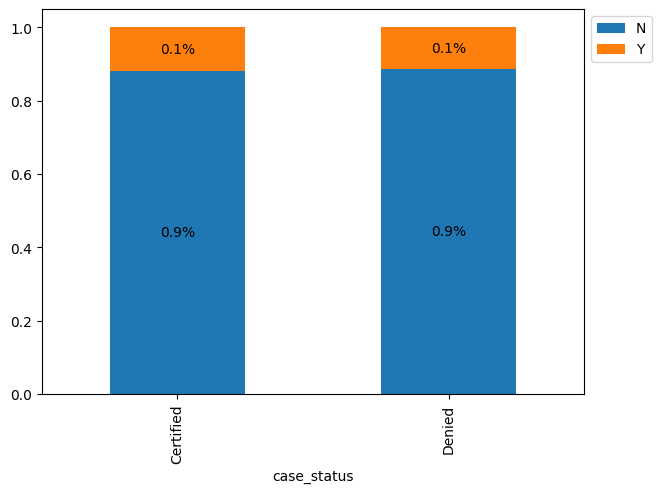

region_of_employment  Island  Midwest  Northeast  South  West    All
case_status                                                         
All                      375     4307       7195   7017  6586  25480
Certified                226     3253       4526   4913  4100  17018
Denied                   149     1054       2669   2104  2486   8462
------------------------------------------------------------------------------------------------------------------------


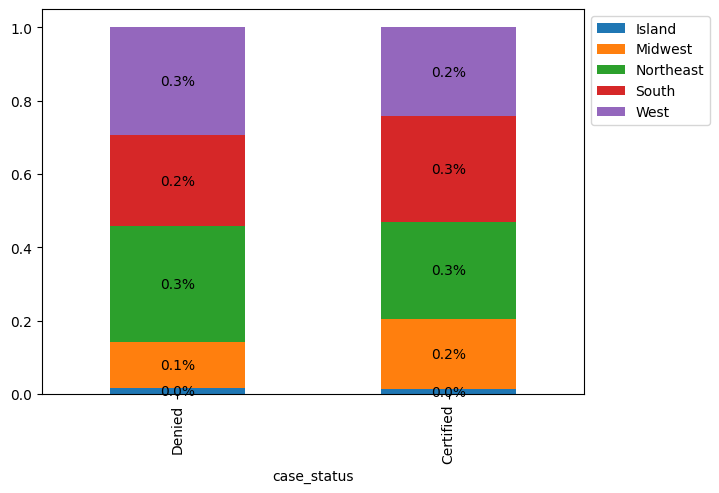

unit_of_wage  Hour  Month  Week   Year    All
case_status                                  
All           2157     89   272  22962  25480
Certified      747     55   169  16047  17018
Denied        1410     34   103   6915   8462
------------------------------------------------------------------------------------------------------------------------


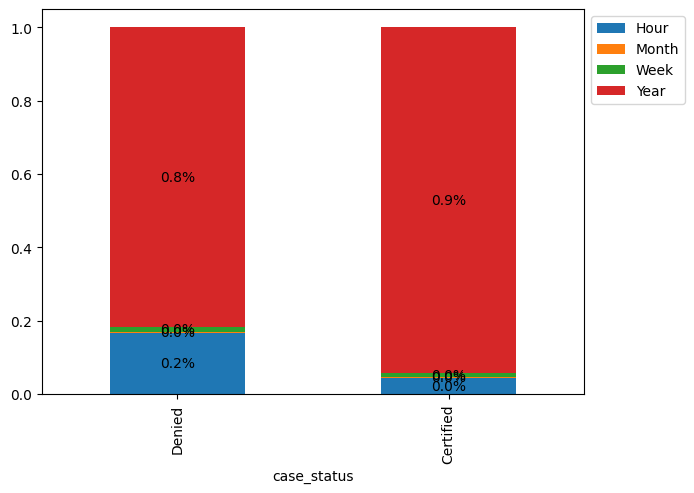

full_time_position     N      Y    All
case_status                           
All                 2707  22773  25480
Certified           1855  15163  17018
Denied               852   7610   8462
------------------------------------------------------------------------------------------------------------------------


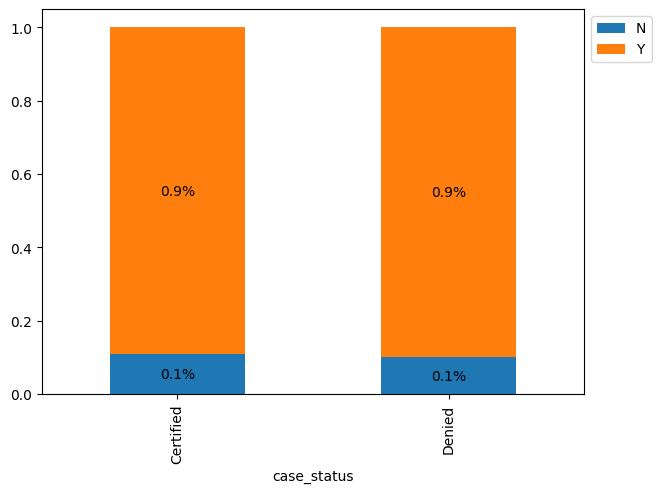

case_status  Certified  Denied    All
case_status                          
Denied               0    8462   8462
All              17018    8462  25480
Certified        17018       0  17018
------------------------------------------------------------------------------------------------------------------------


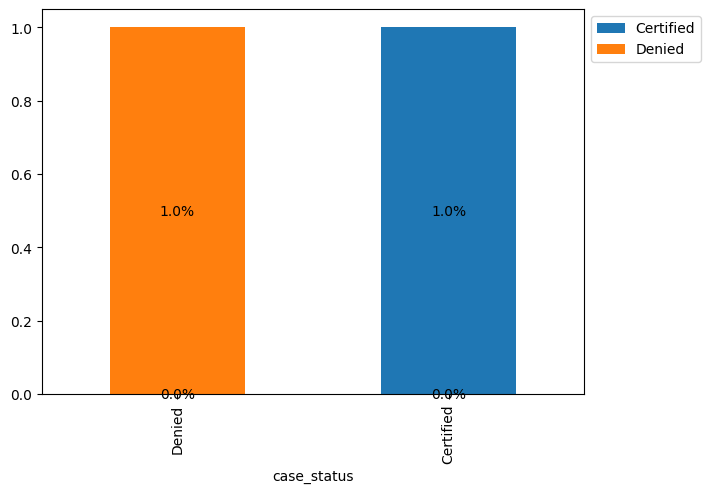

In [ ]:
cols_cat = df.select_dtypes(['object'])
for i in cols_cat.columns:
    stacked_barplot(df, "case_status", i,perc=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


## Data Pre-processing

In [ ]:
# Convert object type columns to category data type
for col in ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']:
    df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.7 KB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


### Outlier Check

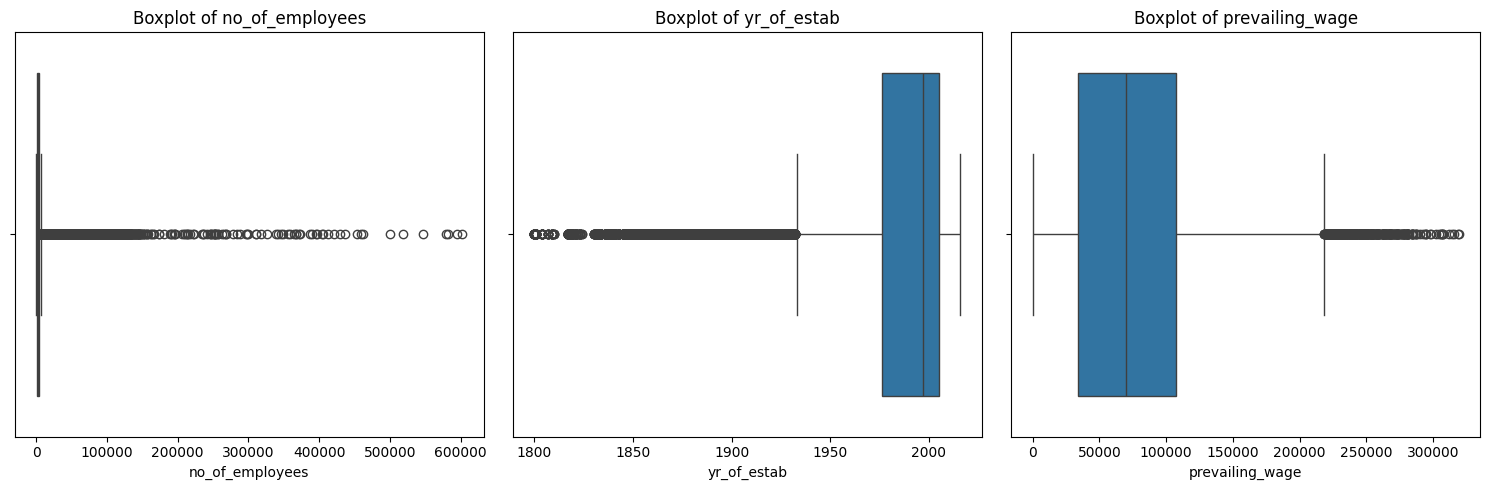

'\nyr_of_estab: The boxplot for yr_of_estab also has several data points outside the whiskers, particularly on the lower end.\nThese outliers represent companies that were established much earlier than most of the companies in the dataset.\nprevailing_wage: The boxplot for prevailing_wage shows a considerable number of outliers on the upper end, indicating jobs with\nsignificantly higher prevailing wages than the typical wages.Most likely these are the C-level executives.\n'

In [ ]:
# Outlier detection for numerical columns using boxplots

# Identify numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Determine the number of columns for subplots
n_cols = len(numerical_cols)

# Plot boxplots for numerical columns to visualize outliers
plt.figure(figsize=(5 * n_cols, 5)) # Adjust figure size based on number of columns
for i, col in enumerate(numerical_cols):
    plt.subplot(1, n_cols, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

'''
yr_of_estab: The boxplot for yr_of_estab also has several data points outside the whiskers, particularly on the lower end.
These outliers represent companies that were established much earlier than most of the companies in the dataset.
prevailing_wage: The boxplot for prevailing_wage shows a considerable number of outliers on the upper end, indicating jobs with
significantly higher prevailing wages than the typical wages.Most likely these are the C-level executives.
'''

### Data Preparation for modeling

In [ ]:
df["case_status"] = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

In [ ]:
X = df.drop(["case_status"], axis=1)
y = df["case_status"]

X = pd.get_dummies(X, drop_first=True)

#X = X.astype(float)

# Splitting data into training, validation and test set:

# first split data into 2 parts, temporary and test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5, stratify=y
)

# then split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=5, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(16307, 21) (4077, 21) (5096, 21)


## Model Building

### Model Evaluation Criterion

- Choose the primary metric to evaluate the model on
- Elaborate on the rationale behind choosing the metric

**F1-Score**
In this case study, both False Positives and False Negatives have significant implications:

**False Positives (FP)**: The model predicts a visa will be "Certified," but it is actually "Denied."
Business Impact: This leads to the OFLC spending time and resources processing an application that will ultimately be rejected. It can also lead to disappointment for the applicant. Minimizing FPs is important for efficient resource allocation.


**False Negatives (FN)**: The model predicts a visa will be "Denied," but it is actually "Certified."
Business Impact: This means a qualified applicant who should have received a visa is incorrectly flagged for denial. This could lead to missing out on valuable talent and potentially harming the reputation of the employer and EasyVisa. Minimizing FNs is crucial for ensuring deserving applicants are identified.

Choosing the F1-score as the primary metric is appropriate because it reflects the need to accurately identify certified visas while also minimizing the misclassification of denied visas.


In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

In [ ]:
# Defining scorer to be used for cross-validation and hyperparameter tuning
from sklearn.metrics import make_scorer, f1_score
import sklearn.metrics as metrics # Import the metrics module

scorer = metrics.make_scorer(metrics.f1_score)

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with Original data

In [ ]:
classifier_models = []  # Empty list to store all the models

# Appending models into the list
classifier_models.append(("Bagging", BaggingClassifier(random_state=1)))
classifier_models.append(("Random forest", RandomForestClassifier(random_state=1)))
classifier_models.append(("GBM", GradientBoostingClassifier(random_state=1)))
classifier_models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
classifier_models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
classifier_models.append(("dtree", DecisionTreeClassifier(random_state=1)))

cv_results = []  # Empty list to store all model's CV scores
model_names = []  # Empty list to store name of the models



print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in classifier_models:
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1
    )
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring = scorer,cv=kfold
    )
    cv_results.append(cv_result)
    model_names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in classifier_models:
    model.fit(X_train, y_train) ## Fit the model on the training data

    scores = f1_score(y_val, model.predict(X_val))

    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.7758299039890854
Random forest: 0.8024121449923192
GBM: 0.8238885702596367
Adaboost: 0.8189559465932378
Xgboost: 0.8073271352009186
dtree: 0.7408394523788735

Validation Performance:

Bagging: 0.7791827011178303
Random forest: 0.8065654782915637
GBM: 0.8220472440944881
Adaboost: 0.8231071611690309
Xgboost: 0.8117522871217453
dtree: 0.7409594095940959


**Sample Outputs**

1st Run Output:k-fold=2
Cross-Validation performance on training dataset:

Bagging: 0.8095838055499316
Random forest: 0.8195110819998865
GBM: 0.823319135178664
Adaboost: 0.8190801954460168
Xgboost: 0.8001576898818001
dtree: 0.7842461888496248

Validation Performance:

Bagging: 0.8191621000530317
Random forest: 0.8222523744911805
GBM: 0.8234271810914147
Adaboost: 0.8231071611690309
Xgboost: 0.8117522871217453
dtree: 0.7837741243745533

2nd Run: K-Fold :5
Cross-Validation performance on training dataset:

Bagging: 0.8105660642143931
Random forest: 0.8198101345509705
GBM: 0.8246083353226196
Adaboost: 0.8193538637950031
Xgboost: 0.8077313655945456
dtree: 0.7818329699203961

Validation Performance:

Bagging: 0.8191621000530317
Random forest: 0.8222523744911805
GBM: 0.8234271810914147
Adaboost: 0.8231071611690309
Xgboost: 0.8117522871217453
dtree: 0.7837741243745533

3rd RunL: K-fold =10
Systems kept crashing after evaluating a couple of models and those are almost same as above two runs. After changing the data type from object to categorical, this issue was resolved.

Cross-Validation performance on training dataset:

Bagging: 0.8122947439519758
Random forest: 0.8209690102855726
GBM: 0.8248780233350977
Adaboost: 0.8189559465932378
Xgboost: 0.8073271352009186
dtree: 0.7787465566920349

Cross-Validation performance on training dataset:

Bagging: 0.7758299039890854
Random forest: 0.8024121449923192
GBM: 0.8238885702596367
Adaboost: 0.8189559465932378
Xgboost: 0.8073271352009186
dtree: 0.7408394523788735

Validation Performance:

Bagging: 0.7791827011178303
Random forest: 0.8065654782915637
GBM: 0.8220472440944881
Adaboost: 0.8231071611690309
Xgboost: 0.8117522871217453
dtree: 0.7409594095940959

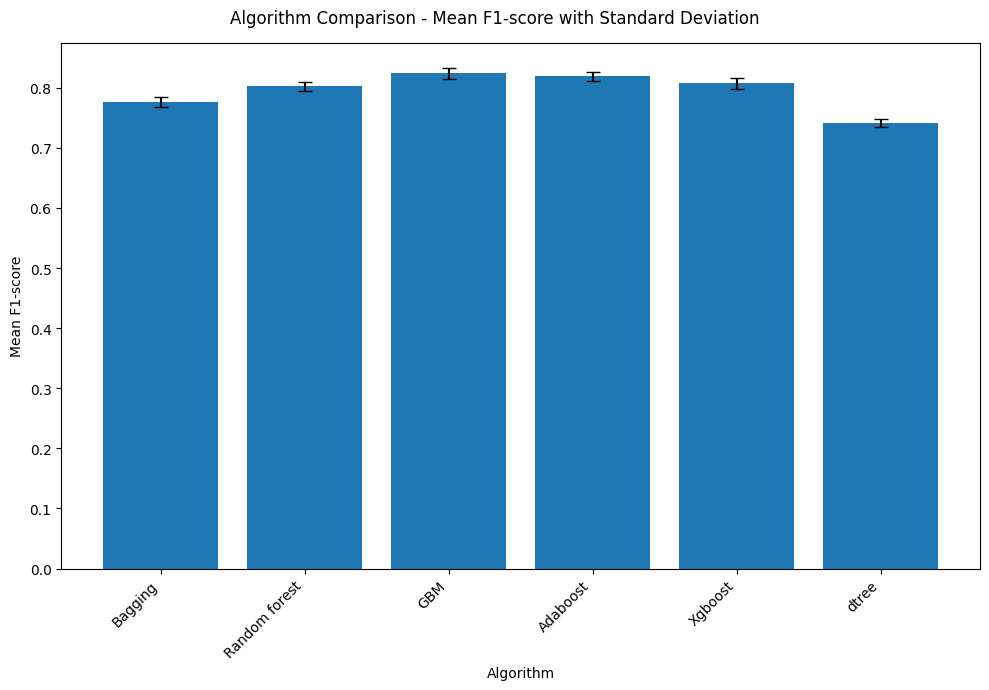

In [ ]:
# Visualize the cross-validation performance using a bar plot

fig = plt.figure(figsize=(10, 7))
fig.suptitle("Algorithm Comparison - Mean F1-score with Standard Deviation")
ax = fig.add_subplot(111)

# Calculate mean and standard deviation of CV results
means = [result.mean() for result in cv_results]
stds = [result.std() for result in cv_results]

# Create a bar plot
ax.bar(model_names, means, yerr=stds, capsize=5)
ax.set_ylabel("Mean F1-score")
ax.set_xlabel("Algorithm")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Summarize cross-validation performance in a table

# Calculate mean and standard deviation of CV results
means = [result.mean() for result in cv_results]
stds = [result.std() for result in cv_results]

# Create a DF to display the summary
cv_summary_df = pd.DataFrame({'Model': model_names, 'Mean F1-score': means, 'F1-score Std. Dev.': stds})

# Add a rank column based on Mean F1-score (higher is better)
cv_summary_df['Rank'] = cv_summary_df['Mean F1-score'].rank(ascending=False).astype(int)

# Display the table sorted by Rank
display(cv_summary_df.sort_values(by='Rank'))

,Model,Mean F1-score,F1-score Std. Dev.,Rank
2,GBM,0.823889,0.008792,1
3,Adaboost,0.818956,0.007613,2
4,Xgboost,0.807327,0.009151,3
1,Random forest,0.802412,0.007659,4
0,Bagging,0.775830,0.007885,5
5,dtree,0.740839,0.006773,6


### Model Building with Oversampled data

In [ ]:
# Model building with Oversampled data using SMOTE

# Check the count of target variable before oversampling
print("Count of target variable before oversampling:")
print("Class 0:", y_train.value_counts().get(0, 0))
print("Class 1:", y_train.value_counts().get(1, 0))


# Apply SMOTE to the training data
# 'auto' sampling strategy oversamples only the minority class to make the number of samples equal to the majority class.
smote = SMOTE(sampling_strategy = 1, k_neighbors=5, random_state=1)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Check the count of target variable after oversampling
print("\nCount of target variable after oversampling:")
print("Class 0:", y_train_oversampled.value_counts().get(0, 0))
print("Class 1:", y_train_oversampled.value_counts().get(1, 0))



Count of target variable before oversampling:
Class 0: 5416
Class 1: 10891

Count of target variable after oversampling:
Class 0: 10891
Class 1: 10891


In [ ]:
# Model building with Oversampled data using SMOTE

# Check the count of target variable before oversampling
print("Count of target variable before oversampling:")
print("Class 0:", y_train.value_counts().get(0, 0))
print("Class 1:", y_train.value_counts().get(1, 0))


# Apply SMOTE to the training data
# 'auto' sampling strategy oversamples only the minority class to make the number of samples equal to the majority class.
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=1)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Check the count of target variable after oversampling
print("\nCount of target variable after oversampling:")
print("Class 0:", y_train_oversampled.value_counts().get(0, 0))
print("Class 1:", y_train_oversampled.value_counts().get(1, 0))


# Now, train and evaluate a subset of models on the oversampled data to reduce memory usage

classifier_models_oversampled = []  # Empty list to store a subset of models

# Appending a subset of models into the list

classifier_models_oversampled.append(("Bagging_Oversampled", BaggingClassifier(random_state=1)))
classifier_models_oversampled.append(("Random forest_Oversampled", RandomForestClassifier(random_state=1)))
classifier_models_oversampled.append(("GBM_Oversampled", GradientBoostingClassifier(random_state=1)))
classifier_models_oversampled.append(("Adaboost_Oversampled", AdaBoostClassifier(random_state=1)))
classifier_models_oversampled.append(("Xgboost_Oversampled", XGBClassifier(random_state=1, eval_metric="logloss")))
classifier_models_oversampled.append(("dtree_Oversampled", DecisionTreeClassifier(random_state=1)))


print("\n" "Cross-Validation performance on oversampled training dataset (Subset of Models):" "\n")

cv_results_oversampled = []
model_names_oversampled = []

for name, model in classifier_models_oversampled:
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1
    )
    cv_result = cross_val_score(
        estimator=model, X=X_train_oversampled, y=y_train_oversampled, scoring = scorer, cv=kfold
    )
    cv_results_oversampled.append(cv_result)
    model_names_oversampled.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance on oversampled data (Subset of Models):" "\n")

for name, model in classifier_models_oversampled:
    model.fit(X_train_oversampled, y_train_oversampled)

    scores = f1_score(y_val, model.predict(X_val))

    print("{}: {}".format(name, scores))

Count of target variable before oversampling:
Class 0: 5416
Class 1: 10891

Count of target variable after oversampling:
Class 0: 10891
Class 1: 10891

Cross-Validation performance on oversampled training dataset (Subset of Models):

Bagging_Oversampled: 0.7581912792569844
Random forest_Oversampled: 0.7907219619474991
GBM_Oversampled: 0.8005686344600511
Adaboost_Oversampled: 0.7942409519973284
Xgboost_Oversampled: 0.7961620739492716
dtree_Oversampled: 0.7229078017801924

Validation Performance on oversampled data (Subset of Models):

Bagging_Oversampled: 0.7661093368401277
Random forest_Oversampled: 0.7971145175834085
GBM_Oversampled: 0.8129032258064516
Adaboost_Oversampled: 0.8136011275546159
Xgboost_Oversampled: 0.8106382978723404
dtree_Oversampled: 0.7316341829085458


In [ ]:
#Oversampled Data: Summarize cross-validation performance in a table

# Calculate mean and standard deviation of CV results
means = [result.mean() for result in cv_results_oversampled]
stds = [result.std() for result in cv_results_oversampled]

# Create a pandas DataFrame to display the summary
cv_summary_df = pd.DataFrame({'Model': model_names_oversampled, 'Mean F1-score': means, 'F1-score Std. Dev.': stds})

# Add a rank column based on Mean F1-score (higher is better)
cv_summary_df['Rank'] = cv_summary_df['Mean F1-score'].rank(ascending=False).astype(int)

# Display the table sorted by Rank
display(cv_summary_df.sort_values(by='Rank'))

,Model,Mean F1-score,F1-score Std. Dev.,Rank
2,GBM_Oversampled,0.800569,0.008978,1
4,Xgboost_Oversampled,0.796162,0.006839,2
3,Adaboost_Oversampled,0.794241,0.008627,3
1,Random forest_Oversampled,0.790722,0.005831,4
0,Bagging_Oversampled,0.758191,0.009848,5
5,dtree_Oversampled,0.722908,0.010558,6


sampling strategy =0.5
Model	Mean F1-score	F1-score Std. Dev.	Rank
2	GBM_Oversampled	0.822295	0.003692	1
3	Adaboost_Oversampled	0.819208	0.002283	2
4	Xgboost_Oversampled	0.807732	0.003390	3
1	Random forest_Oversampled	0.801992	0.003759	4
0	Bagging_Oversampled	0.771450	0.005134	5
5	dtree_Oversampled	0.738513	0.011444	6

Sampling Strategy: 'auto', K-fold =5



*   Model	Mean F1-score	F1-score Std. Dev.	Rank

*   2	GBM_Oversampled	0.801715	0.008015	1
*   4	Xgboost_Oversampled	0.794499	0.005633	2
*   3	Adaboost_Oversampled	0.791643	0.007346	3
*   1	Random forest_Oversampled	0.789551	0.004035	4
*   0	Bagging_Oversampled	0.755791	0.004976	5
*   5	dtree_Oversampled	0.724387	0.008800	6


In [ ]:
#Observation: The F1 score of oversampled data has slighly went down when compared to the original data but the top 3 models remain the same.

### Model Building with Undersampled data

In [ ]:
# Model building with undersampled data using random sampler

# Check the count of target variable before undersampling
print("Count of target variable before undersampling:")
print("Class 0:", y_train.value_counts().get(0, 0))
print("Class 1:", y_train.value_counts().get(1, 0))

randomsampler = RandomUnderSampler(random_state=1)
X_train_undersampled, y_train_undersampled = randomsampler.fit_resample(X_train, y_train)



# Check the count of target variable after undersampling
print("\nCount of target variable after undersampling:")
print("Class 0:", y_train_undersampled.value_counts().get(0, 0))
print("Class 1:", y_train_undersampled.value_counts().get(1, 0))


# Now, train and evaluate a subset of models on the oversampled data to reduce memory usage

classifier_models_undersampled = []  # Empty list to store a subset of models

# Appending a subset of models into the list

classifier_models_undersampled.append(("Bagging_Undersampled", BaggingClassifier(random_state=1)))
classifier_models_undersampled.append(("Random forest_Undersampled", RandomForestClassifier(random_state=1)))
classifier_models_undersampled.append(("GBM_Undersampled", GradientBoostingClassifier(random_state=1)))
classifier_models_undersampled.append(("Adaboost_Undersampled", AdaBoostClassifier(random_state=1)))
classifier_models_undersampled.append(("Xgboost_Undersampled", XGBClassifier(random_state=1, eval_metric="logloss")))
classifier_models_undersampled.append(("dtree_Undersampled", DecisionTreeClassifier(random_state=1)))


print("\n" "Cross-Validation performance on underampled training dataset (Subset of Models):" "\n")

cv_results_undersampled = []
model_names_undersampled = []

for name, model in classifier_models_undersampled:
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1
    )
    cv_result = cross_val_score(
        estimator=model, X=X_train_undersampled, y=y_train_undersampled, scoring = scorer, cv=kfold
    )
    cv_results_undersampled.append(cv_result)
    model_names_undersampled.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance on oversampled data (Subset of Models):" "\n")

for name, model in classifier_models_undersampled:
    model.fit(X_train_undersampled, y_train_undersampled)


    scores = f1_score(y_val, model.predict(X_val))

    print("{}: {}".format(name, scores))

Count of target variable before undersampling:
Class 0: 5416
Class 1: 10891

Count of target variable after undersampling:
Class 0: 5416
Class 1: 5416

Cross-Validation performance on underampled training dataset (Subset of Models):

Bagging_Undersampled: 0.6420882173797997
Random forest_Undersampled: 0.6802172319947309
GBM_Undersampled: 0.7107604297469432
Adaboost_Undersampled: 0.6954168406041996
Xgboost_Undersampled: 0.6800597635734353
dtree_Undersampled: 0.6227476939885668

Validation Performance on oversampled data (Subset of Models):

Bagging_Undersampled: 0.7002105263157895
Random forest_Undersampled: 0.7399756986634265
GBM_Undersampled: 0.7686243594797004
Adaboost_Undersampled: 0.7513502700540108
Xgboost_Undersampled: 0.7478435305917753
dtree_Undersampled: 0.6899918633034988


In [ ]:
#Undersampled Data: Summarize cross-validation performance in a table

# Calculate mean and standard deviation of CV results
means = [result.mean() for result in cv_results_undersampled]
stds = [result.std() for result in cv_results_undersampled]

# Create a pandas DataFrame to display the summary
cv_summary_df = pd.DataFrame({'Model': model_names_undersampled, 'Mean F1-score': means, 'F1-score Std. Dev.': stds})

# Add a rank column based on Mean F1-score (higher is better)
cv_summary_df['Rank'] = cv_summary_df['Mean F1-score'].rank(ascending=False).astype(int)

# Display the table sorted by Rank
display(cv_summary_df.sort_values(by='Rank'))

,Model,Mean F1-score,F1-score Std. Dev.,Rank
2,GBM_Undersampled,0.710760,0.016227,1
3,Adaboost_Undersampled,0.695417,0.022278,2
1,Random forest_Undersampled,0.680217,0.015557,3
4,Xgboost_Undersampled,0.680060,0.020461,4
0,Bagging_Undersampled,0.642088,0.019729,5
5,dtree_Undersampled,0.622748,0.020835,6


In [ ]:
#Obseravtion: The undersampled performance is not great when compared to oversampling

## Hyperparameter Tuning

**Best practices for hyperparameter tuning in Gradient Boosting:**

`n_estimators`:

* Start with 100 (default) and increase: 100, 200, 300, 500
* Typically, higher values lead to better performance, but they also increase training time
* Use 200–500 for larger datasets or complex problems
* Monitor validation performance to avoid overfitting, as too many estimators can degrade generalization


`learning_rate`:

* Common values to try: 0.1, 0.05, 0.01, 0.005
* Use lower values (e.g., 0.01 or 0.005) if you are using many estimators (e.g., > 200)
* Higher learning rates (e.g., 0.1) can be used with fewer estimators for faster convergence
* Always balance the learning rate with `n_estimators` to prevent overfitting or underfitting


`subsample`:

* Common values: 0.7, 0.8, 0.9, 1.0
* Use a value between `0.7` and `0.9` for improved generalization by introducing randomness
* `1.0` uses the full dataset for each boosting round, potentially leading to overfitting
* Reducing `subsample` can help reduce overfitting, especially in smaller datasets


`max_features`:

* Common values: `"sqrt"`, `"log2"`, or float (e.g., `0.3`, `0.5`)
* `"sqrt"` (default) works well for classification tasks
* Lower values (e.g., `0.3`) help reduce overfitting by limiting the number of features considered at each split

---

**Tuning GBM with Oversampled data** **

In [ ]:
#Tuning with Oversampled data

model = GradientBoostingClassifier(random_state=1)
param_grid = {
    'n_estimators': np.arange(100, 301, 50),
    'learning_rate': [0.1, 0.05, 0.01, 0.005],
    'max_features': [0.4, 0.6, 0.8, 'sqrt', 'log2'],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'max_depth': [3, 4, 5, 6, 7]
}

# Reduced n_iter to a smaller value and set n_jobs to 1
randomized_cv = RandomizedSearchCV(estimator= model, param_distributions=param_grid, n_iter=60, scoring=scorer, cv=5, random_state=1, n_jobs = 1)

randomized_cv.fit(X_train_oversampled, y_train_oversampled)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1.0, 'n_estimators': np.int64(200), 'max_features': 0.6, 'max_depth': 7, 'learning_rate': 0.05} with CV score=0.8026867976426825:


Run1:
Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 'sqrt', 'learning_rate': 0.1} with CV score=0.7921453509285976:

Run2:
Best parameters are {'subsample': 0.7, 'n_estimators': np.int64(100), 'max_features': 'sqrt', 'learning_rate': 0.2} with CV score=0.7972968828206094:


In [ ]:
tuned_gbm1 = randomized_cv.best_estimator_
tuned_gbm1

GradientBoostingClassifier(learning_rate=0.05, max_depth=7, max_features=0.6,
                           n_estimators=np.int64(200), random_state=1)

In [ ]:
# Checking model's performance on training set
tuned_gbm1_per_train = model_performance_classification_sklearn(tuned_gbm1, X_train_oversampled, y_train_oversampled)
tuned_gbm1_per_train

,Accuracy,Recall,Precision,F1
0,0.837297,0.896245,0.801725,0.846354


In [ ]:
# Checking model's performance on validation set
tuned_gbm1_per_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
tuned_gbm1_per_val

,Accuracy,Recall,Precision,F1
0,0.749571,0.847227,0.792239,0.818811


**Tuning GBM with Undersampled data**

In [ ]:
#Tuning with Undersampled data

model_us = GradientBoostingClassifier(random_state=1)
param_grid = {
    'n_estimators': np.arange(100, 125, 175),
    'learning_rate': [0.01,0.002,0.005,0.2, 0.05, 1],
    'max_features': [0.3,0.5,0.7,1],
    'subsample': [0.8,0.9,1]
}

# Reduced n_iter to a smaller value and set n_jobs to 1
randomized_cv_us = RandomizedSearchCV(estimator= model_us, param_distributions=param_grid, n_iter=60, scoring=scorer, cv=5, random_state=1, n_jobs = 1)

randomized_cv_us.fit(X_train_undersampled, y_train_undersampled)

print("Best parameters are {} with CV score={}:" .format(randomized_cv_us.best_params_,randomized_cv_us.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': np.int64(100), 'max_features': 0.3, 'learning_rate': 0.002} with CV score=0.7185000626402276:


In [ ]:
tuned_gbm2 = randomized_cv_us.best_estimator_
tuned_gbm2

GradientBoostingClassifier(learning_rate=0.002, max_features=0.3,
                           n_estimators=np.int64(100), random_state=1,
                           subsample=0.9)

In [ ]:
# Checking model's performance on training set
tuned_gbm2_per_train = model_performance_classification_sklearn(tuned_gbm2, X_train_undersampled, y_train_undersampled)
tuned_gbm2_per_train



,Accuracy,Recall,Precision,F1
0,0.700425,0.778619,0.673319,0.722151


In [ ]:
# Checking model's performance on validation set
tuned_gbm2_per_val = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val)
tuned_gbm2_per_val

,Accuracy,Recall,Precision,F1
0,0.724798,0.769372,0.809193,0.78878


**Best practices for hyperparameter tuning in AdaBoost:**

`n_estimators`:

- Start with a specific number (50 is used in general) and increase in steps: 50, 75, 85, 100

- Use fewer estimators (e.g., 50 to 100) if using complex base learners (like deeper decision trees)

- Use more estimators (e.g., 100 to 150) when learning rate is low (e.g., 0.1 or lower)

- Avoid very high values unless performance keeps improving on validation

`learning_rate`:

- Common values to try: 1.0, 0.5, 0.1, 0.01

- Use 1.0 for faster training, suitable for fewer estimators

- Use 0.1 or 0.01 when using more estimators to improve generalization

- Avoid very small values (< 0.01) unless you plan to use many estimators (e.g., >500) and have sufficient data


---

**Tuning AdaBoost with Oversampled data**

In [ ]:
#Tuning with Oversampled data

model_ada_os = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,151,25),
    "learning_rate": [1.0, 0.5, 0.1, 0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1)
    ]
}


randomized_cv_ada_os = RandomizedSearchCV(estimator= model_ada_os, param_distributions=param_grid, n_iter=60, scoring=scorer, cv=5, random_state=1, n_jobs = 1)

randomized_cv_ada_os.fit(X_train_oversampled, y_train_oversampled)

print("Best parameters are {} with CV score={}:" .format(randomized_cv_ada_os.best_params_,randomized_cv_ada_os.best_score_))

Best parameters are {'n_estimators': np.int64(150), 'learning_rate': 0.5, 'estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.79568825738802:


In [ ]:
tuned_ada1 = randomized_cv_ada_os.best_estimator_
tuned_ada1

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=0.5, n_estimators=np.int64(150),
                   random_state=1)

In [ ]:
tuned_ada1_train_per = model_performance_classification_sklearn(tuned_ada1, X_train_oversampled, y_train_oversampled)
tuned_ada1_train_per

,Accuracy,Recall,Precision,F1
0,0.787623,0.83647,0.762024,0.797514


In [ ]:
tuned_ada1_val_per = model_performance_classification_sklearn(tuned_ada1, X_val, y_val)
tuned_ada1_val_per

,Accuracy,Recall,Precision,F1
0,0.740005,0.824826,0.79392,0.809078


**Tuned AdaBoost with Undersampled Data**

In [ ]:
#Tuning with Undersampled data

model_ada_os = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1)
    ]
}


randomized_cv_ada_us = RandomizedSearchCV(estimator= model_ada_os, param_distributions=param_grid, n_iter=60, scoring=scorer, cv=5, random_state=1, n_jobs = 1)

randomized_cv_ada_us.fit(X_train_undersampled, y_train_undersampled)


print("Best parameters are {} with CV score={}:" .format(randomized_cv_ada_us.best_params_,randomized_cv_ada_us.best_score_))

Best parameters are {'n_estimators': np.int64(30), 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.7167386624801043:


In [ ]:
tuned_ada2 = randomized_cv_ada_us.best_estimator_
tuned_ada2

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=0.2, n_estimators=np.int64(30),
                   random_state=1)

In [ ]:
tuned_ada2_train_per = model_performance_classification_sklearn(tuned_ada2, X_train_oversampled, y_train_oversampled)
tuned_ada2_train_per

,Accuracy,Recall,Precision,F1
0,0.691626,0.785327,0.661383,0.718046


In [ ]:
tuned_ada2_val_per = model_performance_classification_sklearn(tuned_ada2, X_val, y_val)
tuned_ada2_val_per

,Accuracy,Recall,Precision,F1
0,0.726269,0.775615,0.807031,0.791011


**Best practices for hyperparameter tuning in XGBoost:**

`n_estimators`:

* Start with 50 and increase in steps: 50,75,100,125.
* Use more estimators (e.g., 150-250) when using lower learning rates
* Monitor validation performance
* High values improve learning but increase training time

`subsample`:

* Common values: 0.5, 0.7, 0.8, 1.0
* Use `0.7–0.9` to introduce randomness and reduce overfitting
* `1.0` uses the full dataset in each boosting round; may overfit on small datasets
* Values < 0.5 are rarely useful unless dataset is very large

`gamma`:

* Try values: 0 (default), 1, 3, 5, 8
* Controls minimum loss reduction needed for a split
* Higher values make the algorithm more conservative (i.e., fewer splits)
* Use values > 0 to regularize and reduce overfitting, especially on noisy data


`colsample_bytree`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled per tree
* Lower values (e.g., 0.3 or 0.5) increase randomness and improve generalization
* Use `1.0` when you want all features considered for every tree


`colsample_bylevel`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled at each tree level (i.e., per split depth)
* Lower values help in regularization and reducing overfitting
* Often used in combination with `colsample_bytree` for fine control over feature sampling

---

**Tuning XGBoost with Oversampled data**

In [ ]:
#Tuning with Oversampled data

model_XGB_os = XGBClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,301,75),
    "learning_rate": [0.1, 0.05, 0.0005,0.01, 0.005],
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
    "gamma": [0.1, 0.5, 1, 1.5, 3, 5],
    "colsample_bytree":[0.5, 0.7, 0.8, 0.9, 1.0],
    "colsample_bylevel":[0.3, 0.5, 0.7, 1.0]

}

randomized_cv_XGB_os = RandomizedSearchCV(estimator= model_XGB_os, param_distributions=param_grid, n_iter=60, scoring=scorer, cv=5, random_state=1, n_jobs = 1)

randomized_cv_XGB_os.fit(X_train_oversampled, y_train_oversampled)

print("Best parameters are {} with CV score={}:" .format(randomized_cv_XGB_os.best_params_,randomized_cv_XGB_os.best_score_))

Best parameters are {'subsample': 0.8, 'n_estimators': np.int64(275), 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.3} with CV score=0.8017742971748916:


In [ ]:
tuned_xgb1 = randomized_cv_XGB_os.best_estimator_
tuned_xgb1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.3, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None,
              n_estimators=np.int64(275), n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
tuned_XGB1_train_per = model_performance_classification_sklearn(tuned_xgb1, X_train_oversampled, y_train_oversampled)
tuned_XGB1_train_per

,Accuracy,Recall,Precision,F1
0,0.808007,0.867689,0.775162,0.81882


In [ ]:
tuned_XGB1_val_per = model_performance_classification_sklearn(tuned_xgb1, X_val, y_val)
tuned_XGB1_val_per

,Accuracy,Recall,Precision,F1
0,0.748099,0.844657,0.792011,0.817487


**Tuning XGBoost with Undersampled data**

In [ ]:
#Tuning with Undersampled data

model_XGB_us = XGBClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "subsample": [0.1, 0.01, 0.2, 0.05, 1],
    "gamma": [1, 3, 5, 8],
    "colsample_bytree":[0.3, 0.5, 0.7, 1.0],
    "colsample_bylevel":[0.3, 0.5, 0.7, 1.0]

}


randomized_cv_XGB_us = RandomizedSearchCV(estimator= model_XGB_us, param_distributions=param_grid, n_iter=60, scoring=scorer, cv=5, random_state=1, n_jobs = 1)

randomized_cv_XGB_us.fit(X_train_undersampled, y_train_undersampled)

print("Best parameters are {} with CV score={}:" .format(randomized_cv_XGB_us.best_params_,randomized_cv_XGB_us.best_score_))

Best parameters are {'subsample': 1, 'n_estimators': np.int64(10), 'gamma': 5, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.3} with CV score=0.7213007476094899:


In [ ]:
tuned_xgb2 = randomized_cv_XGB_us.best_estimator_
tuned_xgb2

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.3, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None,
              n_estimators=np.int64(10), n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
tuned_XGB2_train_per = model_performance_classification_sklearn(tuned_xgb2, X_train_oversampled, y_train_oversampled)
tuned_XGB2_train_per

,Accuracy,Recall,Precision,F1
0,0.70595,0.765219,0.684124,0.722403


In [ ]:
tuned_XGB2_val_per = model_performance_classification_sklearn(tuned_xgb2, X_val, y_val)
tuned_XGB2_val_per

,Accuracy,Recall,Precision,F1
0,0.723817,0.757253,0.815987,0.785524


**Best practices for hyperparameter tuning in Random Forest:**


`n_estimators`:

* Start with a specific number (50 is used in general) and increase in steps: 50, 75, 100, 125
* Higher values generally improve performance but increase training time
* Use 100-150 for large datasets or when variance is high


`min_samples_leaf`:

* Try values like: 1, 2, 4, 5, 10
* Higher values reduce model complexity and help prevent overfitting
* Use 1–2 for low-bias models, higher (like 5 or 10) for more regularized models
* Works well in noisy datasets to smooth predictions


`max_features`:

* Try values: `"sqrt"` (default for classification), `"log2"`, `None`, or float values (e.g., `0.3`, `0.5`)
* `"sqrt"` balances between diversity and performance for classification tasks
* Lower values (e.g., `0.3`) increase tree diversity, reducing overfitting
* Higher values (closer to `1.0`) may capture more interactions but risk overfitting


`max_samples` (for bootstrap sampling):

* Try float values between `0.5` to `1.0` or fixed integers
* Use `0.6–0.9` to introduce randomness and reduce overfitting
* Smaller values increase diversity between trees, improving generalization

---

**Tuning RandomForest with Oversampled data**

In [ ]:
#Tuning with Oversampled data

model_RF_os = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(100,301,50),
    "min_samples_leaf": [1,2,4,6,8, 10],
    "max_features": [0.3,0.4,0.6],
    "max_samples":[0.8, 0.9,1 ],
    "max_depth" : [15,25,35,None],
    "min_samples_split":[5,7,10]

}


randomized_cv_RF_os = RandomizedSearchCV(estimator= model_RF_os, param_distributions=param_grid, n_iter=60, scoring=scorer, cv=5, random_state=1, n_jobs = 1)

randomized_cv_RF_os.fit(X_train_oversampled, y_train_oversampled)

print("Best parameters are {} with CV score={}:" .format(randomized_cv_RF_os.best_params_,randomized_cv_RF_os.best_score_))

Best parameters are {'n_estimators': np.int64(300), 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_samples': 0.9, 'max_features': 0.3, 'max_depth': 15} with CV score=0.799912035707444:


In [ ]:
tuned_RF1 = randomized_cv_RF_os.best_estimator_
tuned_RF1

RandomForestClassifier(max_depth=15, max_features=0.3, max_samples=0.9,
                       min_samples_split=7, n_estimators=np.int64(300),
                       random_state=1)

In [ ]:
tuned_RF1_train_per = model_performance_classification_sklearn(tuned_RF1, X_train_oversampled, y_train_oversampled)
tuned_RF1_train_per

,Accuracy,Recall,Precision,F1
0,0.840878,0.900376,0.804628,0.849814


In [ ]:
tuned_RF1_val_per = model_performance_classification_sklearn(tuned_RF1, X_val, y_val)
tuned_RF1_val_per

,Accuracy,Recall,Precision,F1
0,0.743439,0.837312,0.790843,0.813414


**Tuning RF with Undersampled data**

In [ ]:
#Tuning with Oversampled data

model_RF_us = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(75,100,125),
    "min_samples_leaf": [6,8, 10],
    "max_features": [0.3],
    "max_samples":[0.7, 0.9  ]

}


randomized_cv_RF_us = RandomizedSearchCV(estimator= model_RF_us, param_distributions=param_grid, n_iter=60, scoring=scorer, cv=5, random_state=1, n_jobs = 1)

randomized_cv_RF_us.fit(X_train_undersampled, y_train_undersampled)

print("Best parameters are {} with CV score={}:" .format(randomized_cv_RF_us.best_params_,randomized_cv_RF_us.best_score_))

Best parameters are {'n_estimators': np.int64(75), 'min_samples_leaf': 8, 'max_samples': 0.7, 'max_features': 0.3} with CV score=0.7100646221302617:


In [ ]:
tuned_RF2 = randomized_cv_RF_us.best_estimator_
tuned_RF2

RandomForestClassifier(max_features=0.3, max_samples=0.7, min_samples_leaf=8,
                       n_estimators=np.int64(75), random_state=1)

In [ ]:
tuned_RF2_train_per = model_performance_classification_sklearn(tuned_RF2, X_train_oversampled, y_train_oversampled)
tuned_RF2_train_per

,Accuracy,Recall,Precision,F1
0,0.732348,0.749885,0.724474,0.736961


In [ ]:
tuned_RF2_val_per = model_performance_classification_sklearn(tuned_RF2, X_val, y_val)
tuned_RF2_val_per

,Accuracy,Recall,Precision,F1
0,0.714005,0.723467,0.826689,0.771641


## Model Performance Summary and Final Model Selection

In [ ]:
models_training_comparison = pd.concat([tuned_RF1_train_per.T,tuned_RF2_train_per.T,
                                       tuned_XGB1_train_per.T,tuned_XGB2_train_per.T,
                                       tuned_gbm1_per_train.T,tuned_gbm2_per_train.T,
                                       tuned_ada1_train_per.T,tuned_ada2_train_per.T],axis=1,)

models_training_comparison.columns =["RF with Oversampled","RF with Undersampled",
                                        "XGB with Oversampled","XGB with Undersampled",
                                        "GBM with Oversampled","GBM with Undersampled",
                                        "AdaBoost with Oversampled","AdaBoost with Undersampled"
                                        ]

print("Performance of Training Data:")

# Get the F1 scores and sort them in descending order
f1_scores = models_training_comparison.loc['F1'].sort_values(ascending=False)

# Add F1 score for ranking and sort by it
models_training_comparison.loc['F1 Score for Ranking'] = f1_scores
models_training_comparison = models_training_comparison.T.sort_values(by='F1 Score for Ranking', ascending=False).T

# Drop the temporary 'F1 Score for Ranking' row
models_training_comparison = models_training_comparison.drop('F1 Score for Ranking')

# Add Rank based on F1 score
models_training_comparison.loc['Rank based on F1'] = range(1, len(models_training_comparison.columns) + 1)


display(models_training_comparison.T)

Performance of Training Data:


,Accuracy,Recall,Precision,F1,Rank based on F1
RF with Oversampled,0.840878,0.900376,0.804628,0.849814,1.0
GBM with Oversampled,0.837297,0.896245,0.801725,0.846354,2.0
XGB with Oversampled,0.808007,0.867689,0.775162,0.818820,3.0
AdaBoost with Oversampled,0.787623,0.836470,0.762024,0.797514,4.0
RF with Undersampled,0.732348,0.749885,0.724474,0.736961,5.0
XGB with Undersampled,0.705950,0.765219,0.684124,0.722403,6.0
GBM with Undersampled,0.700425,0.778619,0.673319,0.722151,7.0
AdaBoost with Undersampled,0.691626,0.785327,0.661383,0.718046,8.0


**Performance on Validation data**

In [ ]:
models_validation_comparison = pd.concat([tuned_RF1_val_per.T,tuned_RF2_val_per.T,
                                       tuned_XGB1_val_per.T,tuned_XGB2_val_per.T,
                                       tuned_gbm1_per_val.T,tuned_gbm2_per_val.T,
                                       tuned_ada1_val_per.T,tuned_ada2_val_per.T],axis=1,)

models_validation_comparison.columns =["RF with Oversampled","RF with Undersampled",
                                        "XGB with Oversampled","XGB with Undersampled",
                                        "GBM with Oversampled","GBM with Undersampled",
                                        "AdaBoost with Oversampled","AdaBoost with Undersampled"
                                        ]

print("Performance of Validation Data:")

# Get the F1 scores and sort them in descending order
f1_scores = models_validation_comparison.loc['F1'].sort_values(ascending=False)

# Add F1 score for ranking and sort by it
models_validation_comparison.loc['F1 Score for Ranking'] = f1_scores
models_validation_comparison = models_validation_comparison.T.sort_values(by='F1 Score for Ranking', ascending=False).T

# Drop the temporary 'F1 Score for Ranking' row
models_validation_comparison = models_validation_comparison.drop('F1 Score for Ranking')

# Add Rank based on F1 score
models_validation_comparison.loc['Rank based on F1'] = range(1, len(models_validation_comparison.columns) + 1)


display(models_validation_comparison.T)

Performance of Validation Data:


,Accuracy,Recall,Precision,F1,Rank based on F1
GBM with Oversampled,0.749571,0.847227,0.792239,0.818811,1.0
XGB with Oversampled,0.748099,0.844657,0.792011,0.817487,2.0
RF with Oversampled,0.743439,0.837312,0.790843,0.813414,3.0
AdaBoost with Oversampled,0.740005,0.824826,0.793920,0.809078,4.0
AdaBoost with Undersampled,0.726269,0.775615,0.807031,0.791011,5.0
GBM with Undersampled,0.724798,0.769372,0.809193,0.788780,6.0
XGB with Undersampled,0.723817,0.757253,0.815987,0.785524,7.0
RF with Undersampled,0.714005,0.723467,0.826689,0.771641,8.0


In [ ]:
# Compare training and validation F1-scores and calculate the difference

f1_diff = np.absolute( models_training_comparison.loc['F1'] - models_validation_comparison.loc['F1'])

# Create a DataFrame to display the F1-score differences
f1_diff_df = pd.DataFrame({'F1 Score Difference (Train - Val)': f1_diff})

# Rank the models based on the F1-score difference (smaller difference is better)
f1_diff_df['Rank'] = f1_diff_df['F1 Score Difference (Train - Val)'].rank(ascending=True).astype(int)

# Sort by rank
f1_diff_df = f1_diff_df.sort_values(by='Rank')

print("Comparison of Training and Validation F1-scores:")
display(f1_diff_df)

Comparison of Training and Validation F1-scores:


,F1 Score Difference (Train - Val),Rank
XGB with Oversampled,0.001333,1
AdaBoost with Oversampled,0.011564,2
GBM with Oversampled,0.027543,3
RF with Undersampled,0.034680,4
RF with Oversampled,0.036399,5
XGB with Undersampled,0.063121,6
GBM with Undersampled,0.066629,7
AdaBoost with Undersampled,0.072966,8


**Observations**
* Consistency in top performers: The top 4 models on the validation set (XGBoost, AdaBoost, Random Forest, and GBM, all with Oversampled data) remain consistent after further tuning, although their exact F1-scores and rankings within the top 4 have slightly shifted.
* Oversampling is effective: Models trained with oversampling continue to outperform those trained with undersampling on the validation set, reinforcing that oversampling was a good strategy to handle the class imbalance.

In [ ]:
final_model = tuned_xgb1

**Performance on Testing Set**

In [ ]:
test_performance = model_performance_classification_sklearn(final_model, X_test, y_test)
test_performance

,Accuracy,Recall,Precision,F1
0,0.736068,0.834019,0.784471,0.808486


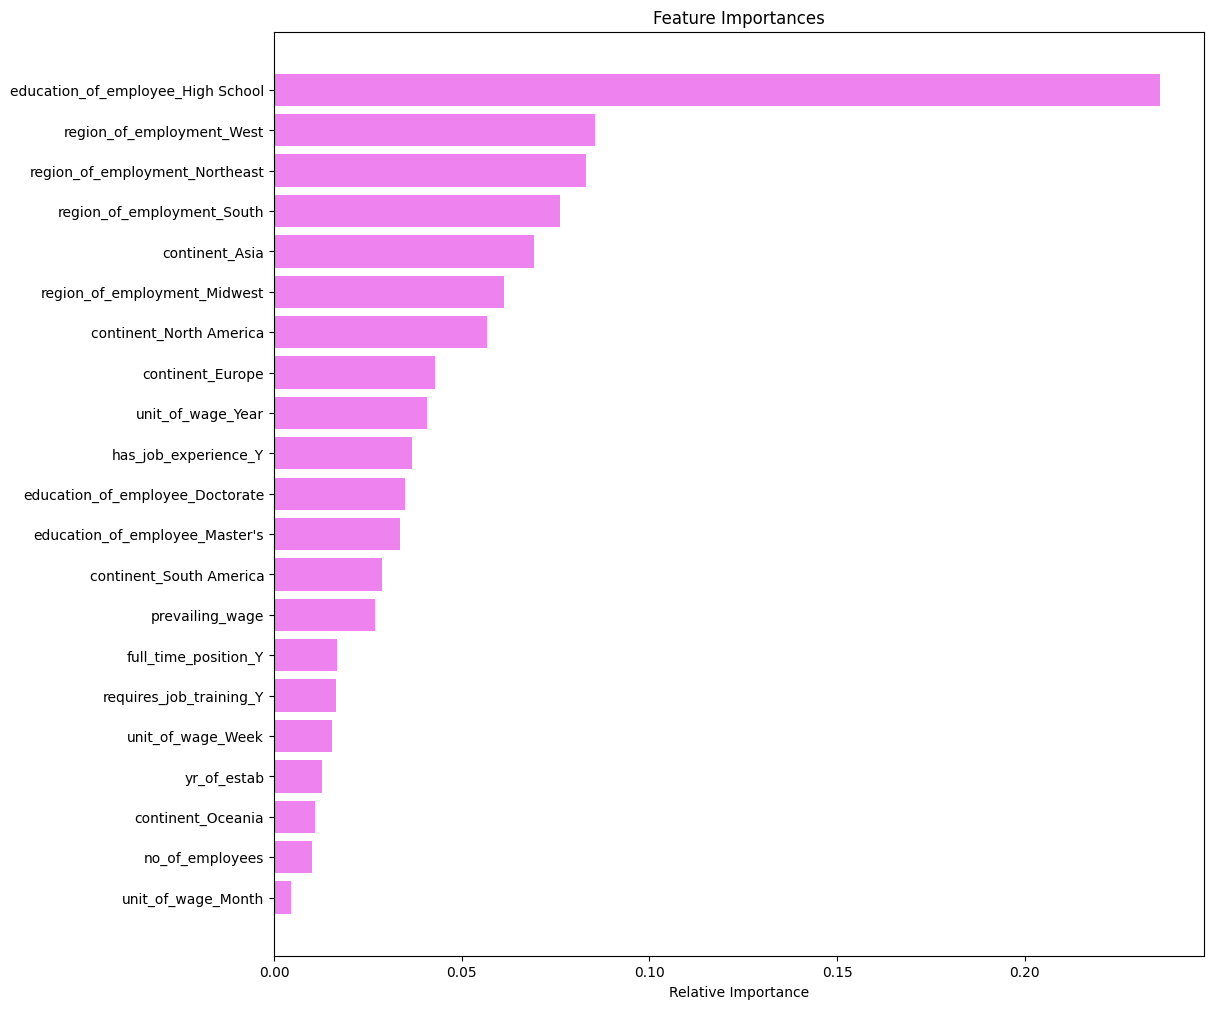

In [ ]:
feature_names = X_train.columns
importances = tuned_xgb1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Actionable Insights and Recommendations

Based on the exploratory data analysis, model building, and evaluation, here are the key insights and recommendations for EasyVisa to facilitate the visa approval process:

**Key Findings:**

1.  **Dominant Applicant Profile:** The majority of applicants in the dataset are from Asia, hold a Bachelor's degree, have prior job experience, and are applying for FT positions with yearly wages, primarily in the Northeast, South, and West regions of the US.
2.  **Factors Influencing Visa Certification:**
    *   **Education:** Higher levels of education (Master's and Doctorate degrees) are strongly associated with a higher likelihood of visa certification.
    *   **Continent:** Applicants from Europe show the highest percentage of visa certifications, followed by Africa, Asia, and North America.
    *   **Job Experience:** Having prior job experience significantly increases the chances of visa certification.
    *   **Prevailing Wage:** Higher prevailing wages are positively correlated with visa certification.
    *   **Unit of Wage:** Yearly wage is the most common unit of wage and is associated with a higher likelihood of certification compared to hourly, weekly, or monthly wages.
    *   **Region of Employment:** While prevailing wages vary across regions, the Northeast, South, and West are the most common regions of intended employment.
3.  **Class Imbalance:** The dataset has a class imbalance, with significantly more certified cases than denied cases. Oversampling the minority class (Denied) using techniques like SMOTE was effective in improving model performance.
4.  **Model Performance:** Ensemble models, particularly Gradient Boosting models (GBM, AdaBoost, XGBoost) and Random Forest, trained on oversampled data, demonstrated the best performance in predicting visa case status based on F1-score on the validation set. XGBoost with Oversampled data achieved the highest validation F1-score and showed good generalization ability (small difference between training and validation F1-scores).
5.  **Feature Importance:** The analysis of feature importances from the tuned XGBoost model highlighted that factors related to the employee's education, the region of employment, and the unit of wage were among the most important features in predicting the case status.

**Recommendations:**

1.  **Prioritize Applications based on Key Drivers:** EasyVisa can use the insights on the key drivers of visa certification (education level,region, job experience, continent, prevailing wage, unit of wage) to prioritize applications that have a higher likelihood of being certified. This can help streamline the initial review process.
2.  **Develop a Predictive Model:** Implement the trained classification model (e.g., the tuned XGBoost with Oversampled data) to assist in shortlisting candidates. The model can provide a probability of certification for each application, allowing officers to focus their detailed review on cases that are less clear-cut or have a higher risk of denial.
3.  **Focus on Data Collection for Influential Features:** Ensure the accurate and consistent collection of data for the features identified as most important by the model (e.g., education level, region of employment, unit of wage). High-quality data for these features will improve the model's accuracy.
4.  **Investigation of Outliers is also important**
5.  **Continuous Monitoring and Model Updates:** The visa application landscape might change in the future. It is crucial to continuously monitor the model's performance on new data and retrain or update the model periodically with the latest information to maintain its accuracy and relevance.
6.  **Consider Business Rules:** While the model provides a data-driven prediction, it's important to consider incorporating any specific business rules or regulations from OFLC into the final decision-making process.